# Main point.
- `SELECT`.
- `WHERE`.

# Designing Database Queries

In the previous lesson, you learned how to apply CRUD operations to financial databases. But before you can use CRUD operations to build financial applications, you need to be able to efficiently query databases (that is, make select or action requests to databases).

Imagine a large e-commerce company that maintains databases for tens of millions of customers and that has terabytes of records. We can’t pull that data into a Pandas DataFrame or a Python application, because our computers don’t have the necessary memory or storage capacity. Instead, we need to selectively query a database by using SQL to access only the data that we need for our application. This is just one reason that SQL is such an in-demand skill in the fintech industry.

In this lesson, you’ll learn how to design efficient SQL queries that filter and select precisely the data that you need.

# Selecting Columns.

A single database table can consist of a hundred columns and a thousand rows of data. In most cases, all the information in a table of that size doesn’t have relevance for an analysis. To access only the information that we need for a particular analysis, we need to make a targeted query. One way to do so involves specifying only the columns containing the information that we need. Let’s explore how to do this.

# Refresher: The SQL SELECT Statement
To get started, let’s have a refresher about how to select columns of data from a database.
The syntax of a SQL SELECT statement is as follows:

In [ ]:
SELECT column_name, column_name, …
FROM table_name
WHERE condition;

First, we’ll import SQLAlchemy and create an engine for a temporary SQLite database by using the following code:

In [1]:
import pandas as pd
import numpy as np

import sqlalchemy

# Create a temporary sqlite database
database_connection_string = 'sqlite:///'

# Create an engine to interact with the database
engine = sqlalchemy.create_engine(database_connection_string)

Next, we’ll use Pandas to create a DataFrame, and we’ll then store the DataFrame as a table in the database, as the following code shows:

In [2]:
stocks_dataframe = pd.DataFrame({'AAPL': [1, 2, 3], 'GOOG': [4, 5, 6]})
display(stocks_dataframe)

,AAPL,GOOG
0,1,4
1,2,5
2,3,6


In [3]:
stocks_dataframe.to_sql('stocks', engine)

In [4]:
engine.table_names()

C:\Users\omarm\AppData\Local\Temp/ipykernel_2836/4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['stocks']

The following image shows the output, which confirms the creation of the `stocks` table:
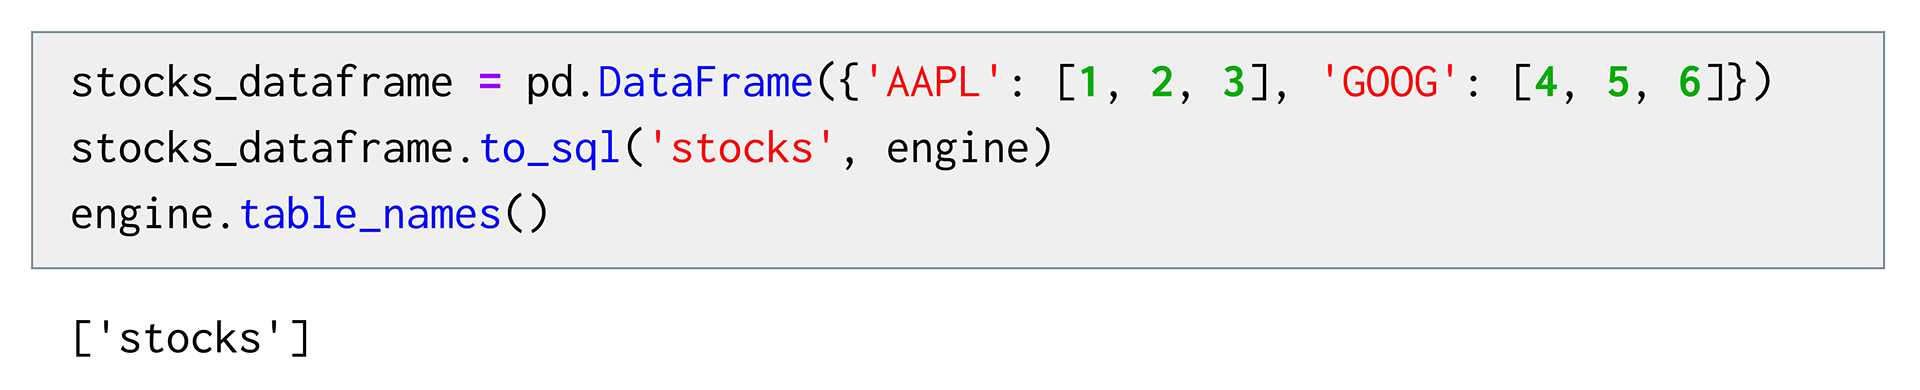

In [6]:
stocks_dataframe

,AAPL,GOOG
0,1,4
1,2,5
2,3,6


Finally, we’ll use the `SELECT` statement to choose the columns that we want to get. In this case, we’ll get all the AAPL data by selecting the “AAPL” column from our table, as the following code shows:

In [7]:
query = """
SELECT "AAPL" FROM stocks;
"""

results = engine.execute(query)
list(results)

[(1,), (2,), (3,)]

The output is returned as a Python list. The list consists of the three rows of data—in this case, the numerical values 1, 2 and 3. The list has each row’s information inside a set of parentheses. The following image shows this output:



Perfect! To complete this refresher, let’s use Pandas to read the data back into a DataFrame. We can then have fun—for example, by plotting the results.

In the previous lesson, we used the Pandas `read_sql_table` function to read an entire table back into a DataFrame. In this case, however, we want to read only the “AAPL” column. To do so, we’ll use the `read_sql_query` function instead.

To use the read_sql_query function, we need to pass it the query string and the engine as parameters. We’ll also plot the new DataFrame, as the following code shows:

<AxesSubplot:>

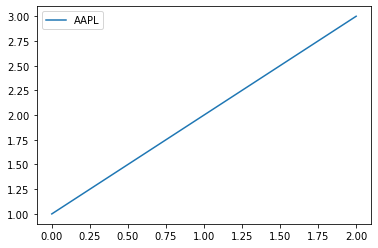

In [8]:
df = pd.read_sql_query(query, con=engine)
df.plot()

In [9]:
df

,AAPL
0,1
1,2
2,3


The plot function from Pandas generates a plot with the DataFrame on which it is called, using the columns' data as the Y axis and the index values as the X axis. The following image shows the resulting plot:

Nice! With just a few lines of code, we selected a subset of data and then brought that data into Python so that we could work with it. Combining SQL with Python gives us the efficiency of SQL and the powerful data analysis tools in Python. It’s a win-win scenario!

It’s possible, however, to get more specific than selecting entire columns from a database. Specifically, we can use conditional selection in the form of the `WHERE`clause. This lets us access specific rows of data within the selected columns. In the next section, we’ll explore conditional selection further and how it makes the database query process more efficient.

# Using Conditional Selection.

In the previous example, we improved our data selection process with the help of the SQL SELECT statement. The ability to select only the columns of data that we need proves helpful and saves much time and space. This is especially true when we work with thousands of columns of data.

But, what happens when we work with millions or even billions of rows of data in those columns that we select? We need to be even more selective with our data.

In these cases, we can add conditional selection to SQL queries by using the WHERE clause.

## Side Notes for excellence.

Conditional selection is based on the use of a conditional operator to evaluate the values that we want to get from the database. The conditional operators that SQL queries use resemble the ones that conditional statements in Python use. They are the following:

The = conditional operator: This means “equals.” Note that SQL uses an equal sign (=), whereas Python uses two consecutive equal signs (==). The > conditional operator: This means “greater than.” The >= conditional operator: This means “greater than or equal to.” The < conditional operator: This means “less than.” The <= conditional operator: This means “less than or equal to.”

With the WHERE clause, we can create conditional statements that a SQL query uses to match data to the values that we define. This resembles the conditional logic that we used in the Pandas loc and iloc functions. In SQL, we can use conditional statements to select only the data that we care about. This proves more efficient when we work with large amounts of data.

Let’s observe the WHERE clause in action.


# Use the WHERE Clause.

As an example, we’ll attach a WHERE clause to our earlier SELECT statement. This time, we’ll select only the values that are less than 3 from the “AAPL” column, as the following code shows:


In [5]:
query = """
SELECT AAPL FROM stocks
WHERE AAPL < 3;
"""
apple_df = pd.read_sql_query(query, con=engine)
apple_df

,AAPL
0,1
1,2


Note that the output consists of a DataFrame that contains a single column named “AAPL”. This column has two rows of data that contain the values 1 and 2. The DataFrame doesn’t include a row with the value 3, because this value doesn’t meet the condition that the WHERE clause specified.

# Join Conditional Statements (MORE).
We can also use the `WHERE` clause to join conditional statements together, just like we did in Python. To do so, we use logical operators, like `AND`, `OR`, and `NOT`.

Let's change our previous query so that we find any “AAPL” values that match 1 or 3. We thus change the query to request the values where the “AAPL” value equals 1 OR the “AAPL” value equals 3, as the following code shows:


In [9]:
query = """
SELECT AAPL FROM stocks
WHERE AAPL = 1 OR AAPL = 3;
"""
df = pd.read_sql_query(query, con=engine)
df

,AAPL
0,1
1,3


Notice that this time, the DataFrame changes to include only the values of 1 and 3, which matches the new query. The DataFrame no longer includes the value of 2.

Now, it’s your turn to create conditional queries in the following activity.

Activity: Creating Conditional Queries

https://courses.bootcampspot.com/courses/800/pages/7-dot-2-4-activity-creating-conditional-queries?module_item_id=235372

# Limiting and Ordering Data.

We know how to select data in database tables to do more targeted analyses. Now, let’s discuss limiting and ordering that data.

In SQL, we use the `LIMIT`clause to control the number of data elements that a query returns. To sort the data by using SQL.

we use the `ORDER`clause. We use this clause together with the `ASC` or `DESC` keyword to specify whether to sort the values in ascending or descending order, respectively. Both the `LIMIT`and the `ORDER`clause help evaluate the data that a SQL query returns. In the following sections, we’ll explore these clauses in more detail.

# Limit Data.

In Pandas, we use indexing to select a specific range of data that we need. For example, say that we need only the first three rows of data. With Pandas, we use either the head function or indexing via iloc to get those three rows, as the following code shows:

In [10]:
# Set the random seed so we all get the same random data
np.random.seed(0)
stocks_dataframe = pd.DataFrame(
    np.random.randint(0, 100, size=(10, 2)),
    columns=["AAPL", "GOOG"]
)

# To view the data, use either the iloc function or the head function.
display(stocks_dataframe.iloc[:3])
display(stocks_dataframe.head(3))

,AAPL,GOOG
0,44,47
1,64,67
2,67,9


,AAPL,GOOG
0,44,47
1,64,67
2,67,9


Note that the DataFrame consists of two columns: “AAPL” and “GOOG”. Only three of the ten rows are displayed. The elements in each column consist of whole numerical values in the range from 0 to 100.

In SQL, we can similarly limit the number of results that return. We do this by adding a`LIMIT `clause to our`SELECT `statement. The following syntax shows the `SELECT`statement with the LIMIT clause included:


In [ ]:
SELECT column_name, column_name, …
FROM table_name
LIMIT number_of_entries;

To limit the number of returned results, we can thus change any SELECT statement to include a LIMIT clause. Let’s now try an example. Say that we want to update the stocks table, which consists of 10 rows of data. Our query to the database gets only the first three rows, as the following code shows:

stocks_dataframe

In [11]:
stocks_dataframe.to_sql('stocks', engine, index=False, if_exists='replace')

query = """
SELECT *
FROM stocks
LIMIT 3;
"""

limit_df = pd.read_sql_query(query, con=engine)
limit_df

,AAPL,GOOG
0,44,47
1,64,67
2,67,9


Notice that the DataFrame matches the ones that we generated earlier, when we accessed the first three rows of data by using iloc[:3] and head(3). In all cases, we get the first three rows of the “AAPL” and “GOOG” columns from the table.

We can also use the LIMIT clause with more advanced SELECT queries, such as those that include both WHERE and LIMIT clauses. For example, the following code selects all the values where the “AAPL” value is less than 50, and it then limits the results to the first three rows:

In [12]:
query = """
SELECT * FROM stocks
WHERE AAPL < 50
LIMIT 3;
"""

where_limit_df = pd.read_sql_query(query, con=engine)
where_limit_df

,AAPL,GOOG
0,44,47
1,36,87
2,39,87


Notice that all the values from the “AAPL” column are less than 50. This restriction, however, doesn’t apply to the “GOOG” column. The output thus shows values that are greater than 50 in the “GOOG” column.

Setting limits on SQL queries can optimize the data transfer between Pandas and SQL. This proves beneficial when we create financial applications that query a database and then return the results. The reason is that we get only the data that we need.

Limits also prove useful when we create top-n and bottom-n lists—something that analysts love to do. For example, an analysis might need to find the top 10 stocks with the highest daily returns—and we can use limits to do this!

However, one problem exists: we haven’t yet been able to sort our results. To get a true top-n or bottom-n list, we need to order the results before we limit them. Otherwise, we’ll return the first n rows of data from the table that meet the criteria rather than the top-n or bottom-n results.

So, let’s figure out how to order our results next.

# Order Data
In SQL, you order data by adding the ORDER BY clause to the SELECT statement, as the following syntax shows:

In [ ]:
SELECT column_name, column_name, …
FROM table_name,
ORDER BY column_name, column_name, … ASC | DESC;

Notice that in the ORDER BY clause, you can specify the columns by which you want to order the results. You can also sort the results by ascending (ASC) or descending (DESC) order.

Let’s change our previous query to sort the results in the “AAPL” column in descending order, as the following code shows:

In [13]:
query = """
SELECT * FROM stocks
WHERE AAPL < 50
ORDER BY AAPL DESC
LIMIT 3;
"""

orderby_df = pd.read_sql_query(query, con=engine)
orderby_df

,AAPL,GOOG
0,46,88
1,44,47
2,39,87


Notice that the values in the “AAPL” column—46, 44, 39—are now sorted in descending order. This gives us a top-3 list for the dataset.

Now that you’re familiar with limiting and ordering data, it’s time for you to practice with real financial data.

## Activity: Querying Top and Bottom Credit Scores.

https://courses.bootcampspot.com/courses/800/pages/7-dot-2-6-activity-querying-top-and-bottom-credit-scores?module_item_id=235379

# Selecting Data From Multiple Tables

In data engineering, a visual schema often documents the relationships among the tables in a database. For example, the following image shows a Sakila schema (Source: jOOQ (Links to an external site.)). This is a database schema—a logical configuration of database tables and their relationships—for a famous test dataset that people use to test SQL:

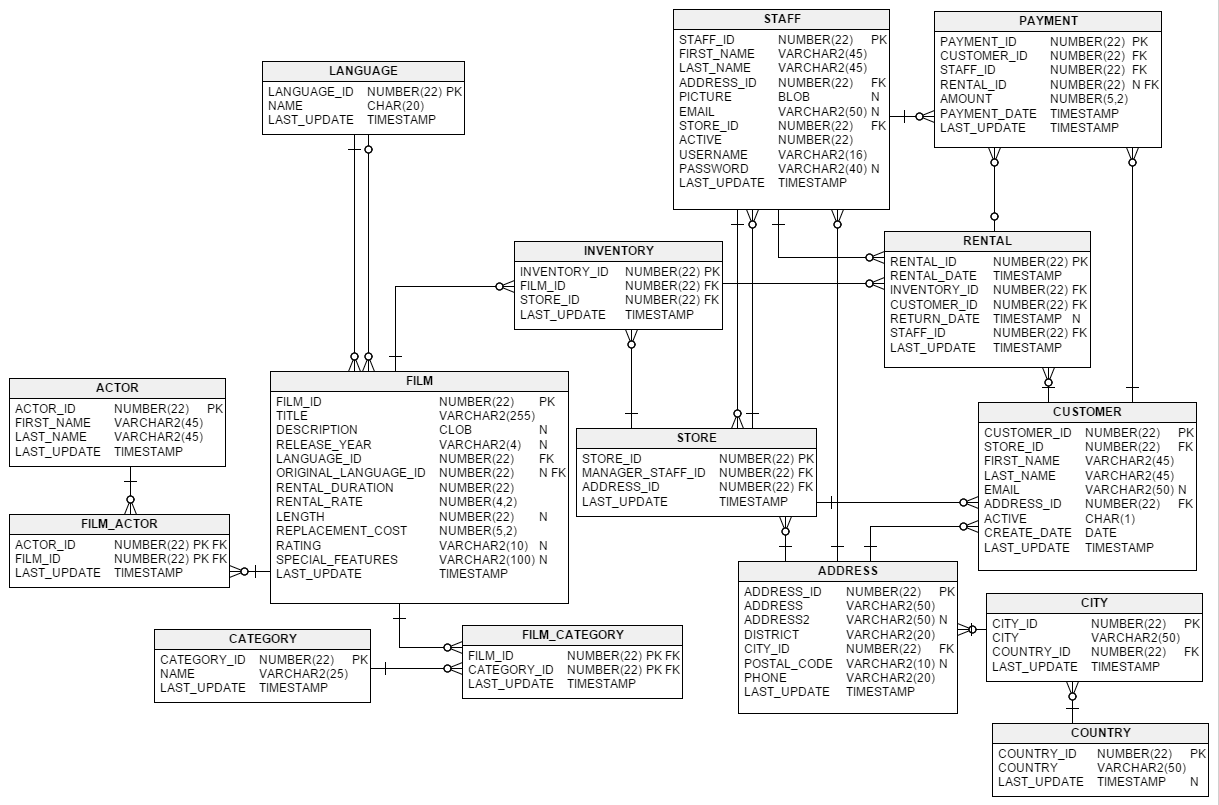

This schema illustrates how elaborate the relationships among the tables in a database can become. Database engineers have their work cut out for them when they have to manage tons of data! Fortunately, we won't concern ourselves with organizing and storing data in database tables in this module. Instead, we'll focus on how to access the data from the database to use it in our financial applications.

Say that the data we need to do an analysis spreads across multiple tables in a database. We need to find a way to join the table data so that it’s returned as a single, comprehensive result. We can do this joining by using a SQL query. But before we dive into SQL joins, let’s explore how to work with and visualize joins by using Pandas.

# Visualizing Joins

We can combine data that spreads across database tables in various ways. These depend on the organization of the data in the tables, the relationships among the tables, and the purpose of the query.

For example, suppose that a financial database contains a table of sales records. Each record includes the customer identifier for that sale. A second table stores the customers’ billing information. Each record in this table contains the customer identifier and other key information, such as the customer name, address, and credit card number. Splitting this data into different tables was out of our control. Regardless, we now need information from both tables—that is, the sales records and the customer information.

To accomplish this goal in SQL, we use joins via the `JOIN clause`. This clause offers four main types of joins: 
`inner join`, 
`left join`,`
right join`, 
and `full join` (also referred to as a full outer join). Depending on our goal, we can use any of these types of joins, which represent different techniques for combining data from multiple tables, as follows:

- Inner join: This selects the elements in every row that match in Table A and Table B.

- Left join: This selects all the elements in Table A (regardless of whether they match the elements in Table B).

- Right join: This selects all the elements in Table B (regardless of whether they match the elements in Table A).

- Full join: This selects all the elements in Table A and in Table B (regardless of whether they match the elements in the other table).

The following image illustrates these four types of joins:

Right now, this is an abstract concept. But joins will make more sense as we begin to work with data in tables. To get some practice, let’s explore a few examples.

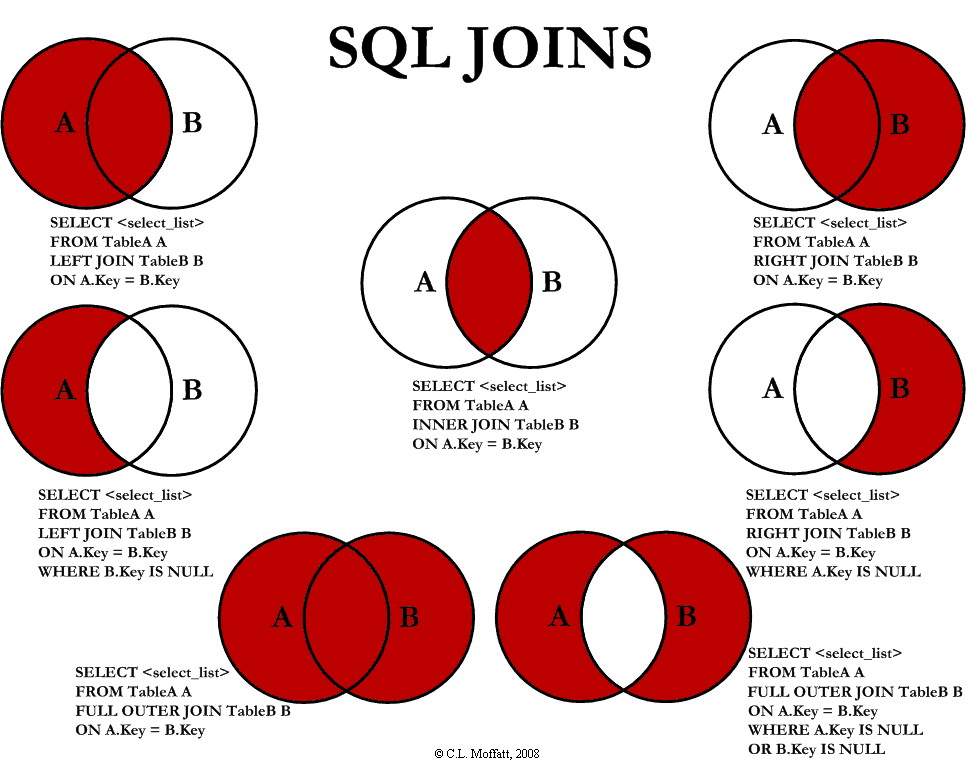

# Using SQL to Join Data


To explore joins in action, we’ll use random data to create tables that we’ll then join together. We’ll begin by generating DataFrames with random data.

In [11]:
from faker import Faker
import random

random.seed()
Faker.seed()
fake = Faker()
available_currencies = []
bank_data = []

for i in range(10):
    currency = fake.currency_name()
    available_currencies.append(currency)
    bank_data.append({
        "bank_id": fake.swift(),
        "bank_default_currency": currency
    })

bank_dataframe = pd.DataFrame(bank_data)
bank_dataframe

,bank_id,bank_default_currency
0,FTJVGB6Y,Zambian kwacha
1,BNBKGBS3,Afghan afghani
2,CFLLGBSFBUP,Colombian peso
3,KHTCGBMUU3Z,Colombian peso
4,HMTMGB8QN1V,Bahamian dollar
5,OPEDGBDFXMS,Russian ruble
6,HXGAGBIH,Mexican peso
7,QNHWGB6R,Burmese kyat
8,BKQBGBAU,Seborga luigino
9,DCRTGBM0,Tajikistani somoni


Notice that the DataFrame consists of two columns, named “bank_default_currency” and “bank_id”, and 10 rows of data.

Next, we’ll use Faker to generate our second DataFrame of customer data, as the following code shows:

In [12]:
customer_data = []

for _ in range(100):
    customer_data.append({
        "first_name": fake.first_name(),
        "last_name": fake.last_name(),
        "address": fake.address(),
        "default_currency": random.choice(available_currencies),
        "bank_id": random.choice(bank_data)["bank_id"]
    })

customer_dataframe = pd.DataFrame(customer_data)
display(customer_dataframe.head(10))
display(customer_dataframe.tail(10))

,first_name,last_name,address,default_currency,bank_id
0,Melissa,Taylor,"913 Brian Mills Suite 798\nBrownland, LA 48029",Colombian peso,QNHWGB6R
1,Joshua,Davis,"13263 Rebekah Stream\nKimberlyfort, NC 43677",Zambian kwacha,HXGAGBIH
2,Maurice,Perry,"049 Shannon Bridge\nAustinland, GA 40062",Bahamian dollar,DCRTGBM0
3,Brian,Warner,"5842 Walsh Corners\nLorraineland, VA 47367",Mexican peso,HMTMGB8QN1V
4,Katherine,Lopez,"1400 Diaz Extension Suite 101\nNew Richard, KY...",Russian ruble,FTJVGB6Y
5,Tracey,Kennedy,"43991 Joshua Junction Suite 634\nAngelamouth, ...",Burmese kyat,BNBKGBS3
6,Steven,Terry,"PSC 2827, Box 5673\nAPO AA 72174",Colombian peso,CFLLGBSFBUP
7,Nancy,Ross,USS Anderson\nFPO AE 36563,Colombian peso,OPEDGBDFXMS
8,Nathan,Thornton,"7620 Gilbert Mall Apt. 707\nWangborough, IL 76811",Mexican peso,QNHWGB6R
9,Tiffany,Graves,"6280 Keith Mountains\nLake Zacharymouth, OR 95220",Seborga luigino,DCRTGBM0


,first_name,last_name,address,default_currency,bank_id
90,Joy,James,"3639 Ward Expressway\nGarciamouth, LA 57022",Burmese kyat,OPEDGBDFXMS
91,Joseph,Caldwell,"0859 Jermaine Wall\nGonzalezville, NJ 77849",Afghan afghani,CFLLGBSFBUP
92,Amanda,Howard,"9377 Ryan Drive\nRobertview, KY 36452",Colombian peso,QNHWGB6R
93,Melanie,Hansen,"28433 Charles Turnpike\nSouth Glenn, VT 74011",Zambian kwacha,QNHWGB6R
94,Felicia,Smith,"93730 Kenneth Burgs\nWeberfort, KY 56358",Russian ruble,OPEDGBDFXMS
95,Alex,Rivera,"9779 Montoya Flats\nNorth Karenside, KS 60530",Burmese kyat,FTJVGB6Y
96,Peter,Douglas,USNV Gardner\nFPO AE 55746,Mexican peso,FTJVGB6Y
97,Andrew,Rice,"8640 Mckinney Avenue Apt. 993\nSamanthamouth, ...",Tajikistani somoni,BKQBGBAU
98,Sandra,Barrett,"227 Ellis Spring Apt. 270\nContrerasfort, IL 7...",Colombian peso,FTJVGB6Y
99,Jessica,Williams,"7137 Davis Flats\nCarlstad, CA 91884",Russian ruble,BNBKGBS3


Notice that this DataFrame contains 100 rows of data in five columns: “address”, “bank_id”, “default_currency”, “first_name”, and “last_name”.

Great! We’ll now use these two DataFrames—bank_dataframe and customer_dataframe—to create tables in a database.

# Create the Database Tables.

In [18]:
engine = sqlalchemy.create_engine(database_connection_string)
bank_dataframe.to_sql('banks', engine, index=False, if_exists='replace')
customer_dataframe.to_sql('customers', engine, index=False, if_exists='replace')
engine.table_names()

C:\Users\omarm\AppData\Local\Temp/ipykernel_6544/3865909420.py:4: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['banks', 'customers']

# Join the Database Tables
Did you notice that the tables in the original DataFrames use the bank's Society for Worldwide Interbank Financial Telecommunications (SWIFT) ID? (The SWIFT ID is a unique identifier code for a bank.) The IDs that bank_dataframe use in its “bank_id” column are the same IDs that customer_dataframe uses in its “bank_id” column. The following image points this out:

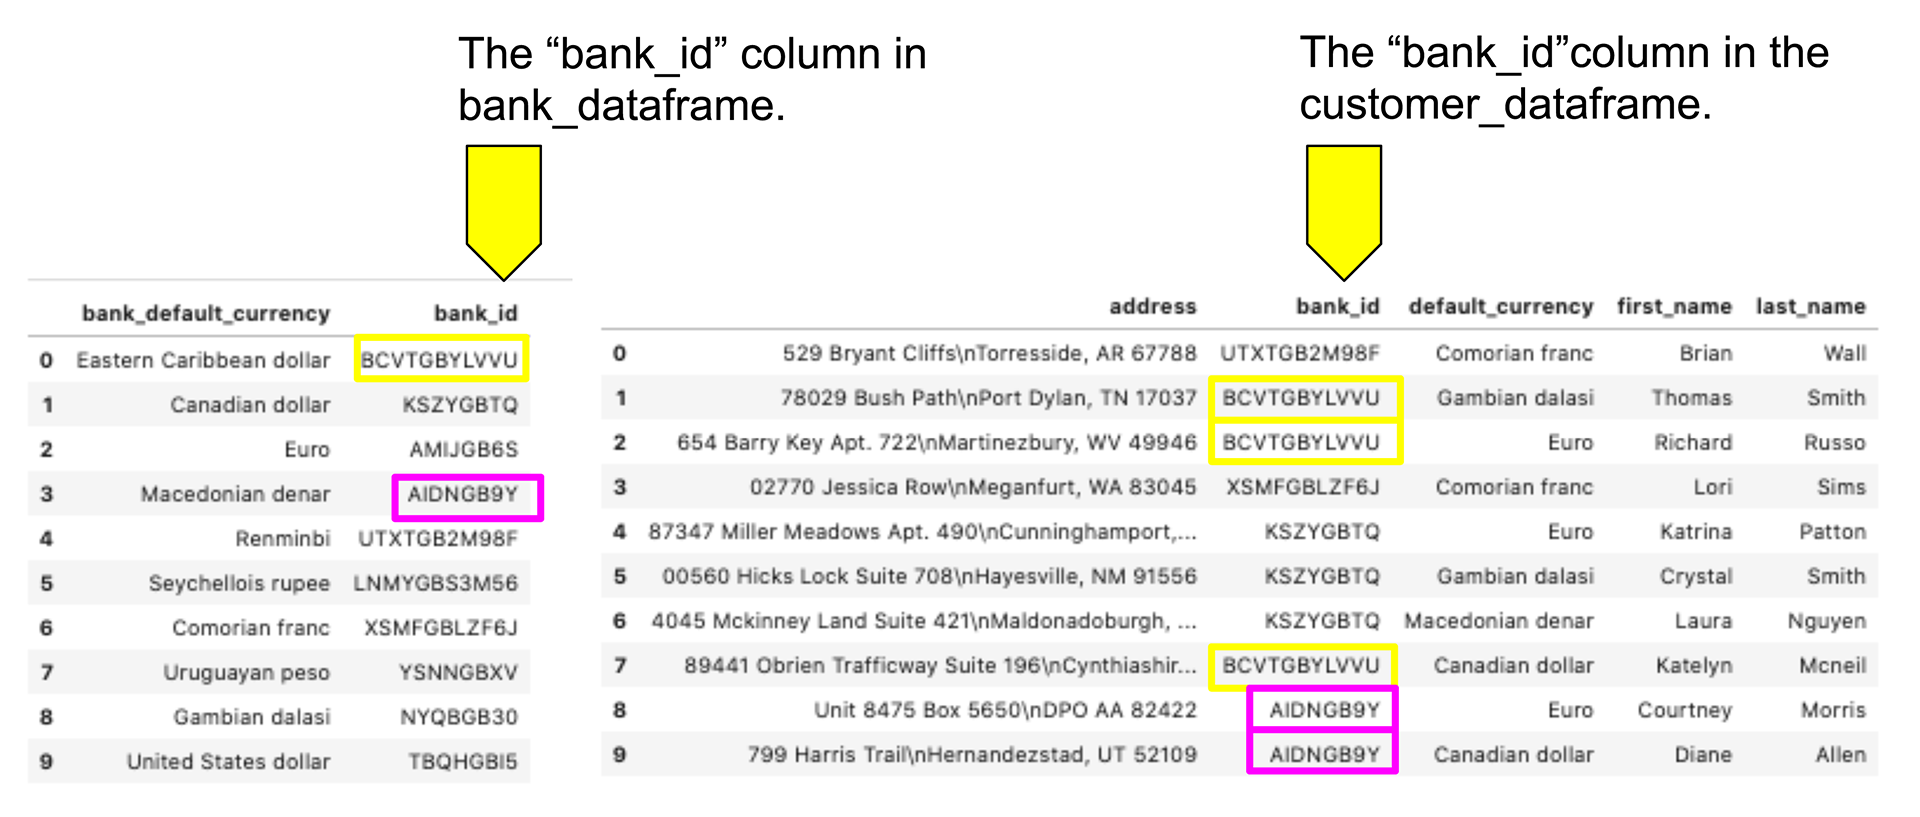

So, let’s perform a join on the tables by using the “bank_id” column. The reason to choose this column is twofold: both tables have it, and it has the common values that link the tables together.

To join data from two tables, we need to tell SQL the first table from which to select data. In this case, we’ll use the banks table. Then, we need to tell SQL the second table from which to join data. In this case, we’ll use the customers table. Finally, we need to specify the columns on which to join the data. These details will tell SQL to find only the rows from both tables where the “bank_id” columns match.

In [19]:
query = """
SELECT *
FROM banks
JOIN customers ON banks.bank_id = customers.bank_id;
"""

joined_df = pd.read_sql_query(query, con=engine)
display(joined_df.head(10))
display(joined_df.tail(10))

,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
0,NVMCGB64,Manx pound,Alexandra,Allen,"187 Santos Hill\nLindseyport, VA 71234",Manx pound,NVMCGB64
1,NVMCGB64,Manx pound,Bradley,Wells,"385 Williamson Alley\nRoweton, DE 50989",Thai baht,NVMCGB64
2,NVMCGB64,Manx pound,Briana,King,"20457 Mark Pines Apt. 279\nWest Jaimechester, ...",Thai baht,NVMCGB64
3,NVMCGB64,Manx pound,Colton,Webb,"54946 Karen Squares Suite 187\nYangbury, NV 63394",Cuban peso,NVMCGB64
4,NVMCGB64,Manx pound,Jennifer,Nelson,"001 Williams Knolls\nPort Brandyburgh, AZ 66702",Jersey pound,NVMCGB64
5,NVMCGB64,Manx pound,Jennifer,Smith,"44007 Melissa Mountain Apt. 237\nNew Bradley, ...",Tajikistani somoni,NVMCGB64
6,NVMCGB64,Manx pound,Jennifer,Torres,"PSC 8802, Box 5382\nAPO AE 51192",Manx pound,NVMCGB64
7,NVMCGB64,Manx pound,Katherine,Riley,Unit 5590 Box 5477\nDPO AP 43373,Vanuatu vatu,NVMCGB64
8,NVMCGB64,Manx pound,Rebecca,Thompson,"73127 Smith Island Apt. 365\nPort Timothytown,...",Malagasy ariar,NVMCGB64
9,NVMCGB64,Manx pound,Richard,Walters,4009 Anthony Plaza Suite 493\nLake Patriciabur...,Serbian dinar,NVMCGB64


,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
90,IQUSGBXND7W,Vanuatu vatu,Stephanie,Johnson,Unit 2163 Box 5980\nDPO AP 15622,Thai baht,IQUSGBXND7W
91,IQUSGBXND7W,Vanuatu vatu,Wendy,Myers,"350 Adams Ville Suite 832\nEast Julie, RI 23365",Serbian dinar,IQUSGBXND7W
92,OZLIGBB9,Malagasy ariar,Angela,Vincent,"1223 Jill Terrace\nPhilipton, DE 71640",Jersey pound,OZLIGBB9
93,OZLIGBB9,Malagasy ariar,Joshua,Elliott,"10838 George Circle\nPort Jeremyfurt, ND 21456",Vanuatu vatu,OZLIGBB9
94,OZLIGBB9,Malagasy ariar,Joshua,Landry,"3692 Charles Meadows Apt. 375\nCourtneyshire, ...",Jersey pound,OZLIGBB9
95,OZLIGBB9,Malagasy ariar,Kathryn,Adams,"6980 Sharp Skyway\nBrittanyville, TN 59487",Serbian dinar,OZLIGBB9
96,OZLIGBB9,Malagasy ariar,Lauren,Barrera,"21084 Johnson Brooks\nNew Angela, CT 37816",Malagasy ariar,OZLIGBB9
97,OZLIGBB9,Malagasy ariar,Lisa,King,"12606 Maria Parkways Suite 699\nLake Tracy, NH...",Vanuatu vatu,OZLIGBB9
98,OZLIGBB9,Malagasy ariar,Michael,Hayes,"2385 Evans Shore\nNorth John, CA 59905",Manx pound,OZLIGBB9
99,OZLIGBB9,Malagasy ariar,Ryan,Chavez,"120 Garcia Shore\nMarktown, DC 83895",Malagasy ariar,OZLIGBB9


The following image shows our new join_df DataFrame, which is the result of our SQL JOIN query:

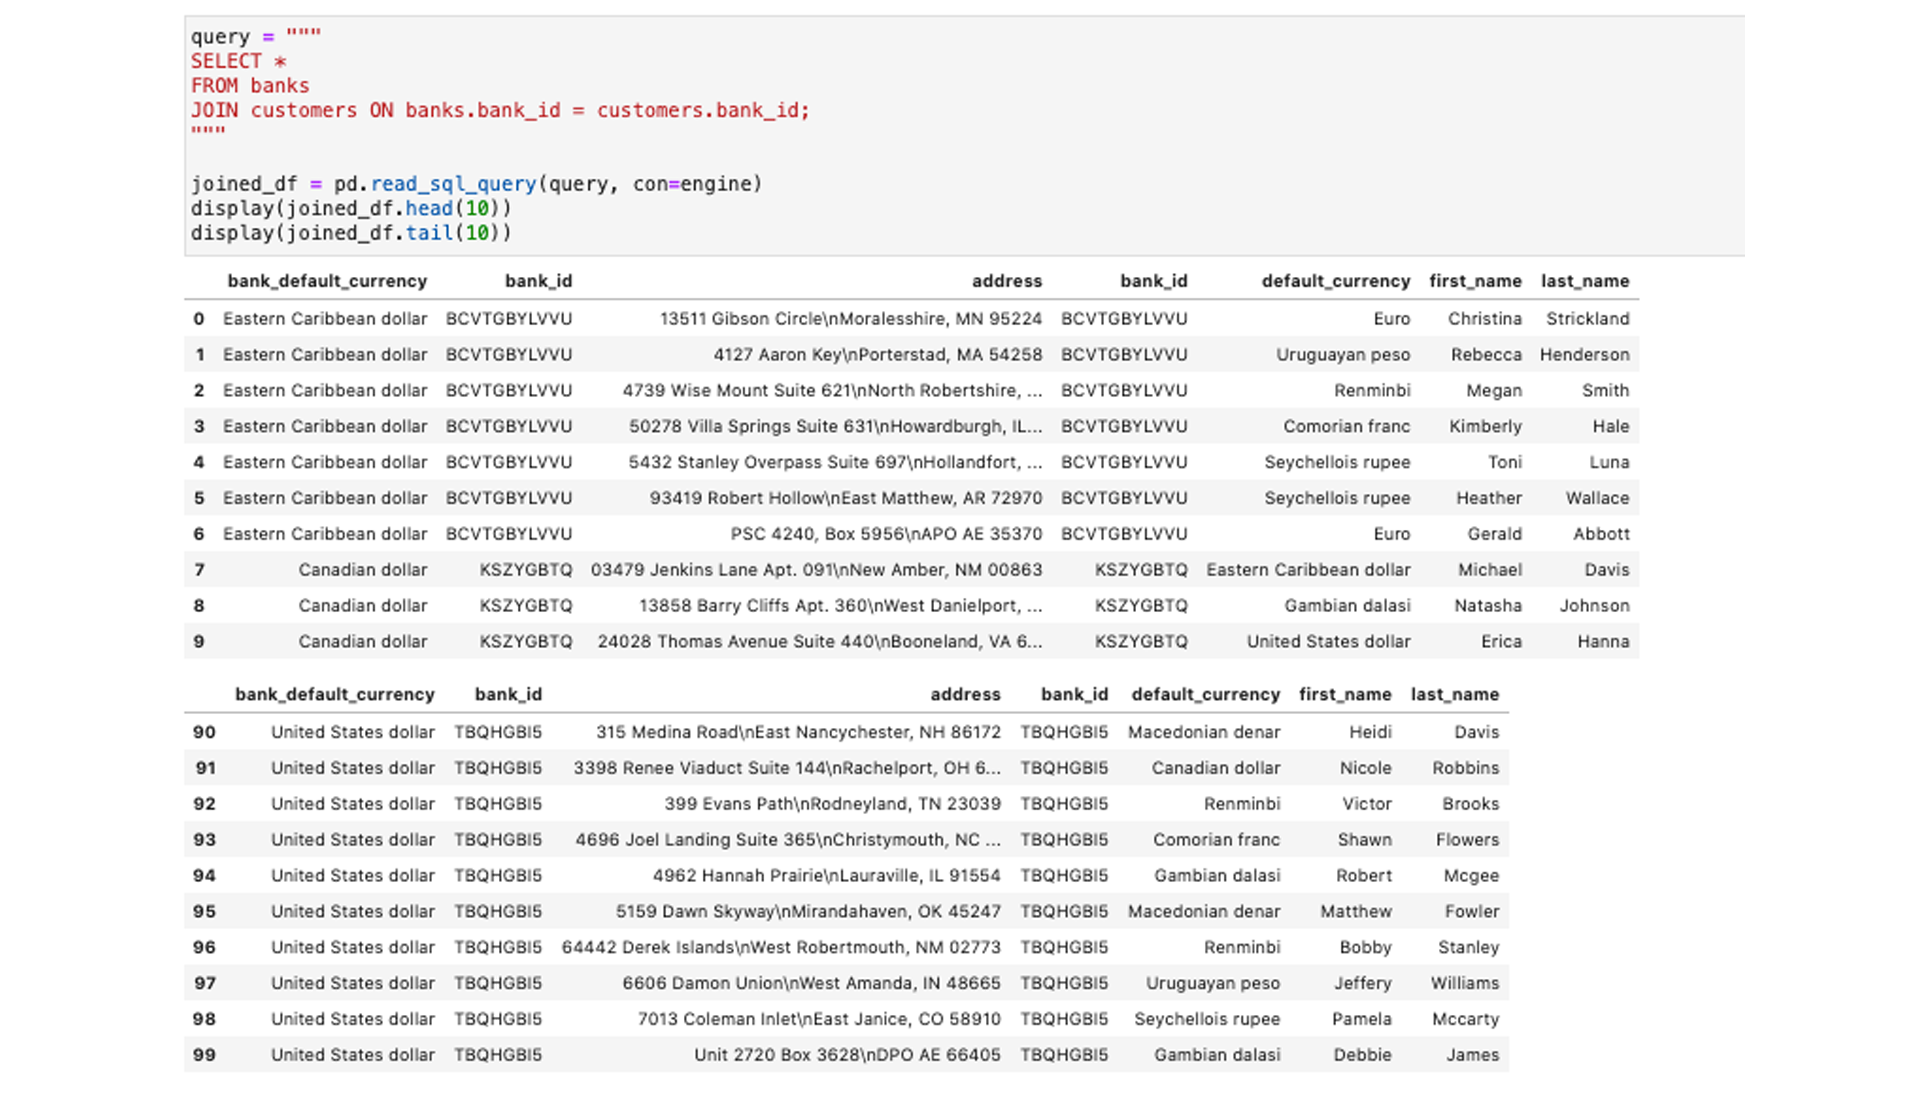

In [20]:
query = """
SELECT *
FROM banks
LEFT JOIN customers ON banks.bank_id = customers.bank_id;
"""

left_join_df = pd.read_sql_query(query, con=engine)
display(left_join_df.head(10))
display(left_join_df.tail(10))

,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
0,NVMCGB64,Manx pound,Alexandra,Allen,"187 Santos Hill\nLindseyport, VA 71234",Manx pound,NVMCGB64
1,NVMCGB64,Manx pound,Bradley,Wells,"385 Williamson Alley\nRoweton, DE 50989",Thai baht,NVMCGB64
2,NVMCGB64,Manx pound,Briana,King,"20457 Mark Pines Apt. 279\nWest Jaimechester, ...",Thai baht,NVMCGB64
3,NVMCGB64,Manx pound,Colton,Webb,"54946 Karen Squares Suite 187\nYangbury, NV 63394",Cuban peso,NVMCGB64
4,NVMCGB64,Manx pound,Jennifer,Nelson,"001 Williams Knolls\nPort Brandyburgh, AZ 66702",Jersey pound,NVMCGB64
5,NVMCGB64,Manx pound,Jennifer,Smith,"44007 Melissa Mountain Apt. 237\nNew Bradley, ...",Tajikistani somoni,NVMCGB64
6,NVMCGB64,Manx pound,Jennifer,Torres,"PSC 8802, Box 5382\nAPO AE 51192",Manx pound,NVMCGB64
7,NVMCGB64,Manx pound,Katherine,Riley,Unit 5590 Box 5477\nDPO AP 43373,Vanuatu vatu,NVMCGB64
8,NVMCGB64,Manx pound,Rebecca,Thompson,"73127 Smith Island Apt. 365\nPort Timothytown,...",Malagasy ariar,NVMCGB64
9,NVMCGB64,Manx pound,Richard,Walters,4009 Anthony Plaza Suite 493\nLake Patriciabur...,Serbian dinar,NVMCGB64


,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
90,IQUSGBXND7W,Vanuatu vatu,Stephanie,Johnson,Unit 2163 Box 5980\nDPO AP 15622,Thai baht,IQUSGBXND7W
91,IQUSGBXND7W,Vanuatu vatu,Wendy,Myers,"350 Adams Ville Suite 832\nEast Julie, RI 23365",Serbian dinar,IQUSGBXND7W
92,OZLIGBB9,Malagasy ariar,Angela,Vincent,"1223 Jill Terrace\nPhilipton, DE 71640",Jersey pound,OZLIGBB9
93,OZLIGBB9,Malagasy ariar,Joshua,Elliott,"10838 George Circle\nPort Jeremyfurt, ND 21456",Vanuatu vatu,OZLIGBB9
94,OZLIGBB9,Malagasy ariar,Joshua,Landry,"3692 Charles Meadows Apt. 375\nCourtneyshire, ...",Jersey pound,OZLIGBB9
95,OZLIGBB9,Malagasy ariar,Kathryn,Adams,"6980 Sharp Skyway\nBrittanyville, TN 59487",Serbian dinar,OZLIGBB9
96,OZLIGBB9,Malagasy ariar,Lauren,Barrera,"21084 Johnson Brooks\nNew Angela, CT 37816",Malagasy ariar,OZLIGBB9
97,OZLIGBB9,Malagasy ariar,Lisa,King,"12606 Maria Parkways Suite 699\nLake Tracy, NH...",Vanuatu vatu,OZLIGBB9
98,OZLIGBB9,Malagasy ariar,Michael,Hayes,"2385 Evans Shore\nNorth John, CA 59905",Manx pound,OZLIGBB9
99,OZLIGBB9,Malagasy ariar,Ryan,Chavez,"120 Garcia Shore\nMarktown, DC 83895",Malagasy ariar,OZLIGBB9


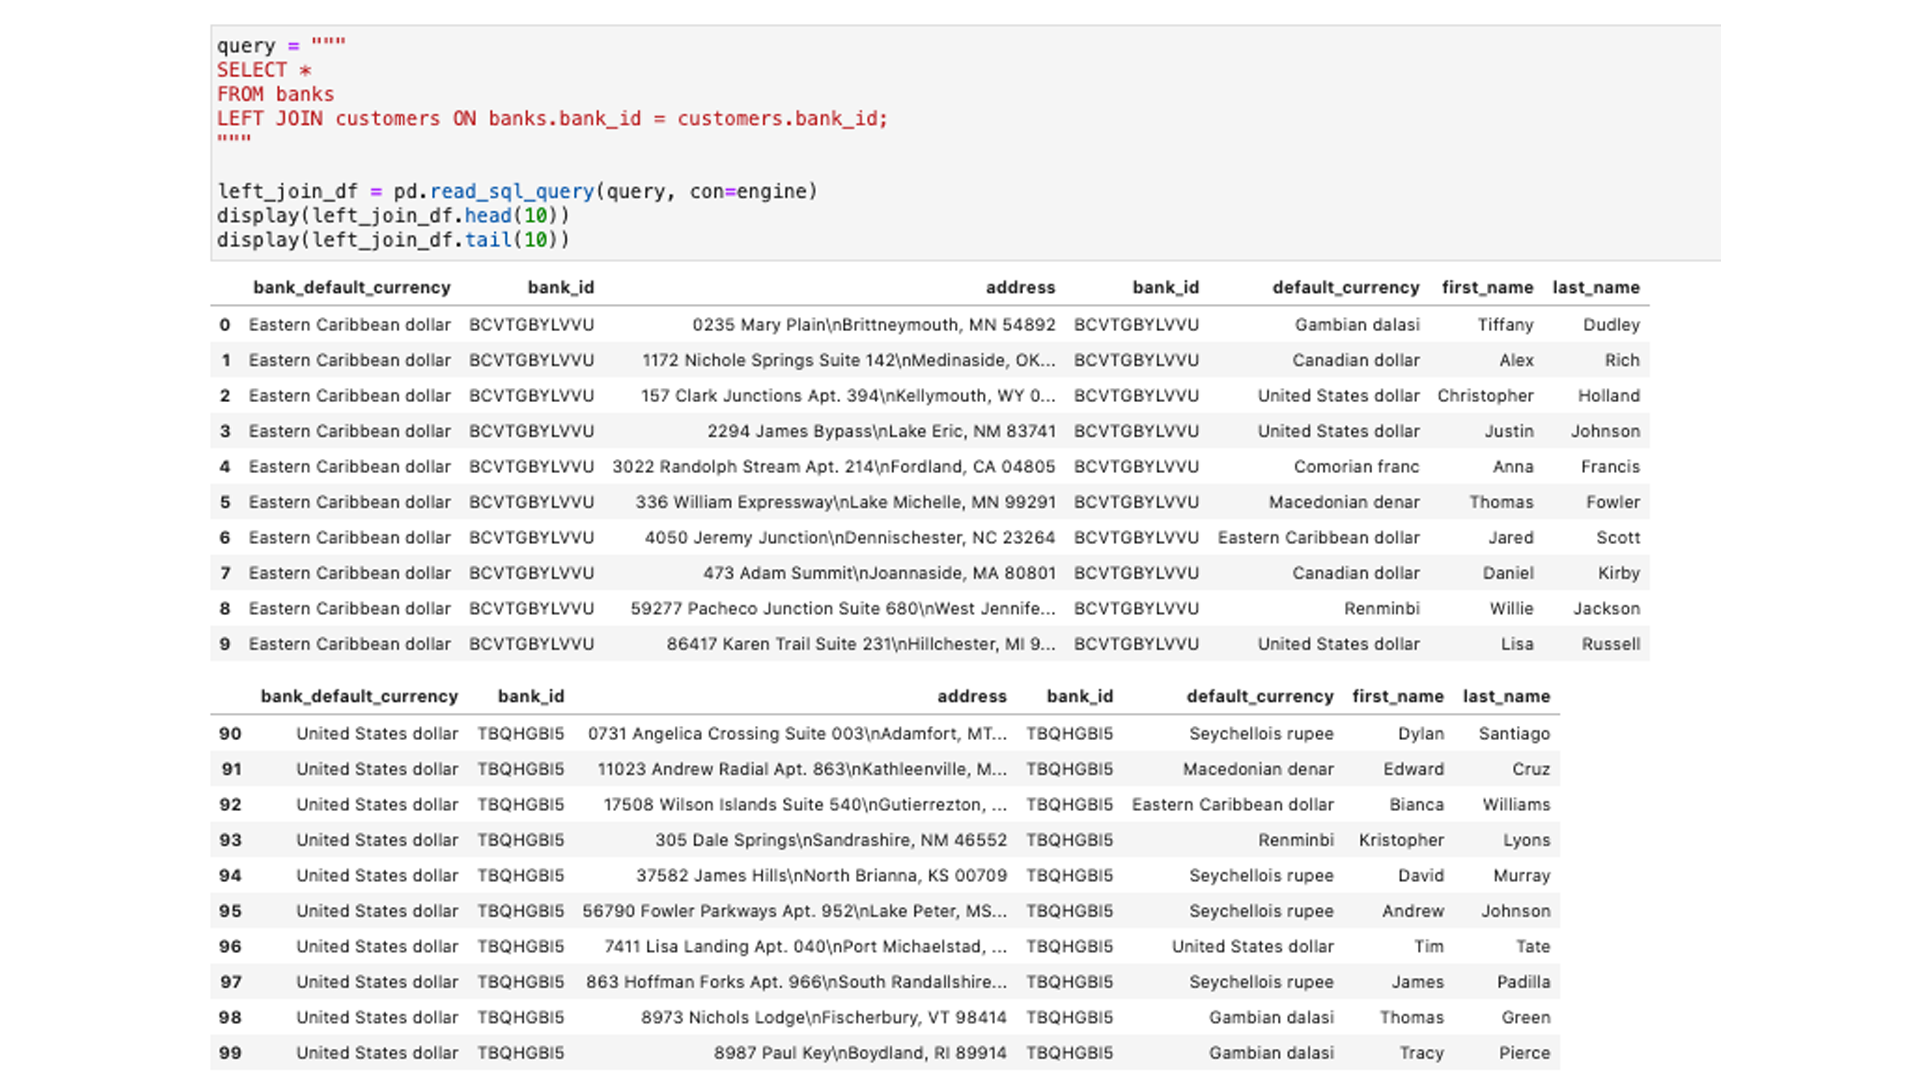

Because both the banks and customers tables contain matching elements in the “bank_id” column, the DataFrame resulting from the query consists of the combined data from both tables. Note that all seven columns are present in this new DataFrame.

With LEFT JOIN, even if the customers table had “bank_id” values that didn’t exist in the banks table, we would still get a DataFrame consisting of all the customer data. Remember that a left join always returns all the rows of data in Table A.

# Analyze the Joined Tables
Because our left join resulted in a DataFrame that combined all the information from both tables, we can do various analysis tasks on it.

For example, say that we want to find the data points where the bank’s default currency is the same as the customer’s default currency. We can find those matches by adding a conditional WHERE clause to our query, as the following code shows:

In [21]:
query = """
SELECT *
FROM banks
JOIN customers ON banks.bank_id = customers.bank_id
WHERE banks.bank_default_currency = customers.default_currency;
"""

join_where_df = pd.read_sql_query(query, con=engine)
display(join_where_df.head())
display(join_where_df.tail())

,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
0,NVMCGB64,Manx pound,Alexandra,Allen,"187 Santos Hill\nLindseyport, VA 71234",Manx pound,NVMCGB64
1,NVMCGB64,Manx pound,Jennifer,Torres,"PSC 8802, Box 5382\nAPO AE 51192",Manx pound,NVMCGB64
2,KUQCGBLY,Cuban peso,Christina,Smith,"1946 Obrien Row Apt. 263\nWest Lisa, ME 37074",Cuban peso,KUQCGBLY
3,KUQCGBLY,Cuban peso,Erica,Bowen,"1187 Silva Lake Suite 158\nWilliamstown, HI 56680",Cuban peso,KUQCGBLY
4,QLBQGB7Y,Uruguayan peso,Samantha,Brooks,"655 Maria Lane\nPort Erikamouth, GA 15830",Uruguayan peso,QLBQGB7Y


,bank_id,bank_default_currency,first_name,last_name,address,default_currency,bank_id
11,IQUSGBXND7W,Vanuatu vatu,James,Holden,"63875 Deanna Causeway\nLake Jacobchester, MD 3...",Vanuatu vatu,IQUSGBXND7W
12,IQUSGBXND7W,Vanuatu vatu,Joseph,Brown,"3050 Perkins Plains\nGarciamouth, OK 64338",Vanuatu vatu,IQUSGBXND7W
13,IQUSGBXND7W,Vanuatu vatu,Patricia,Bullock,"7225 Jones Hollow\nJacksonchester, WY 09597",Vanuatu vatu,IQUSGBXND7W
14,OZLIGBB9,Malagasy ariar,Lauren,Barrera,"21084 Johnson Brooks\nNew Angela, CT 37816",Malagasy ariar,OZLIGBB9
15,OZLIGBB9,Malagasy ariar,Ryan,Chavez,"120 Garcia Shore\nMarktown, DC 83895",Malagasy ariar,OZLIGBB9


The combination of the JOIN clause and the WHERE clause results in a smaller DataFrame. This new DataFrame has the same number of columns but only 14 rows of data rather than the previous 100 rows. The following image shows the new DataFrame:

By combining joins with SELECT statements, we can create sophisticated database queries.

Next, you’ll combine all the querying skills that you learned in this lesson to complete the following activity, in which you’ll join tables to focus on specific data.

https://courses.bootcampspot.com/courses/800/pages/7-dot-2-8-activity-join-crypto-tables?module_item_id=235384